In [1]:
#without low level roi

import os
import numpy as np
import nibabel as nib
from tqdm import tqdm

# 경로 설정
bold_base = "/nas/research/03-Neural_decoding/3-bids/derivatives/raw_rest/sub-01"
dk_path = os.path.join(bold_base, "dk_mask_MNI.nii.gz")

# 사용할 DK label 정의 (시각 처리 관련 20개 ROI)
target_labels = np.array([
    1007, 1008, 1009, 1011, 1015, 1016, 1029,
    2007, 2008, 2009, 2011, 2015, 2016, 2029
])

# DK atlas 로드
dk_img = nib.load(dk_path)
dk_data = dk_img.get_fdata()

sessions = [f"ses-{i:02d}" for i in range(21, 39)]
runs = [f"run-{i:02d}" for i in range(1, 3)]

for ses in tqdm(sessions, desc="Sessions"):
    for run in runs:
        func_dir = os.path.join(bold_base, ses, "func")
        bold_file = os.path.join(func_dir, f"sub-01_{ses}_task-rest_{run}_space-MNI152NLin2009cAsym_desc-be_bold.nii.gz")

        if not os.path.exists(bold_file):
            print(f"File missing: {bold_file}")
            continue

        # fMRI 로드
        bold_img = nib.load(bold_file)
        bold_data = bold_img.get_fdata()  # shape: (X, Y, Z, T)
        T = bold_data.shape[-1]

        # 각 ROI별 평균 시계열 계산
        roi_ts_list = []
        for label in target_labels:
            mask = (dk_data == label)
            roi_voxels = bold_data[mask]  # shape: (n_voxels, T)

            if roi_voxels.size == 0:
                print(f"Warning: label {label} has no voxels in {bold_file}")
                roi_mean = np.zeros(T)
            else:
                roi_mean = np.mean(roi_voxels, axis=0)  # shape: (T,)

            roi_ts_list.append(roi_mean)

        roi_ts = np.stack(roi_ts_list, axis=1)  # shape: (T, 20)

        # Z-score normalization (time series 기준)
        roi_z = (roi_ts - np.mean(roi_ts, axis=0)) / np.std(roi_ts, axis=0)

        # FC matrix 계산
        fc_matrix = np.corrcoef(roi_z.T)  # shape: (20, 20)

        # 저장
        out_prefix = f"sub-01_{ses}_{run}"
        np.save(os.path.join(func_dir, f"{out_prefix}_roi_timeseries_wo_low.npy"), roi_ts)
        np.save(os.path.join(func_dir, f"{out_prefix}_fc_matrix_wo_low.npy"), fc_matrix)



Sessions: 100%|██████████| 18/18 [01:30<00:00,  5.02s/it]


In [4]:
import os
import numpy as np

# 세션 및 런 리스트 정의
sessions = [f"ses-{i:02d}" for i in range(21, 39)]
runs = [f"run-{i:02d}" for i in range(1, 3)]

# 경로 베이스
base_dir = "/nas/research/03-Neural_decoding/3-bids/derivatives/raw_rest/sub-01"

fc_matrices = []

for ses in sessions:
    for run in runs:
        fc_path = os.path.join(base_dir, ses, "func", f"sub-01_{ses}_{run}_fc_matrix_wo_low.npy")
        if os.path.exists(fc_path):
            fc = np.load(fc_path)
            if fc.shape == (14, 14):
                fc_matrices.append(fc)
            else:
                print(f"Skipping {fc_path} due to unexpected shape: {fc.shape}")
        else:
            print(f"Missing: {fc_path}")

# 평균 계산
if fc_matrices:
    fc_mean = np.mean(fc_matrices, axis=0)
    out_path = os.path.join(base_dir, "fc_matrix_wo_low_mean.npy")
    np.save(out_path, fc_mean)
    print(f"Saved average FC matrix to: {out_path}")
else:
    print("No valid FC matrices found.")



Saved average FC matrix to: /nas/research/03-Neural_decoding/3-bids/derivatives/raw_rest/sub-01/fc_matrix_wo_low_mean.npy


In [2]:
#without high level roi

import os
import numpy as np
import nibabel as nib
from tqdm import tqdm

# 경로 설정
bold_base = "/nas/research/03-Neural_decoding/3-bids/derivatives/raw_rest/sub-01"
dk_path = os.path.join(bold_base, "dk_mask_MNI.nii.gz")

# 사용할 DK label 정의 (시각 처리 관련 20개 ROI)
target_labels = np.array([
    1005, 1008, 1009, 1013, 1015, 1016, 1021, 1029,
    2005, 2008, 2009, 2013, 2015, 2016, 2021, 2029
])

# DK atlas 로드
dk_img = nib.load(dk_path)
dk_data = dk_img.get_fdata()

sessions = [f"ses-{i:02d}" for i in range(21, 39)]
runs = [f"run-{i:02d}" for i in range(1, 3)]

for ses in tqdm(sessions, desc="Sessions"):
    for run in runs:
        func_dir = os.path.join(bold_base, ses, "func")
        bold_file = os.path.join(func_dir, f"sub-01_{ses}_task-rest_{run}_space-MNI152NLin2009cAsym_desc-be_bold.nii.gz")

        if not os.path.exists(bold_file):
            print(f"File missing: {bold_file}")
            continue

        # fMRI 로드
        bold_img = nib.load(bold_file)
        bold_data = bold_img.get_fdata()  # shape: (X, Y, Z, T)
        T = bold_data.shape[-1]

        # 각 ROI별 평균 시계열 계산
        roi_ts_list = []
        for label in target_labels:
            mask = (dk_data == label)
            roi_voxels = bold_data[mask]  # shape: (n_voxels, T)

            if roi_voxels.size == 0:
                print(f"Warning: label {label} has no voxels in {bold_file}")
                roi_mean = np.zeros(T)
            else:
                roi_mean = np.mean(roi_voxels, axis=0)  # shape: (T,)

            roi_ts_list.append(roi_mean)

        roi_ts = np.stack(roi_ts_list, axis=1)  # shape: (T, 20)

        # Z-score normalization (time series 기준)
        roi_z = (roi_ts - np.mean(roi_ts, axis=0)) / np.std(roi_ts, axis=0)

        # FC matrix 계산
        fc_matrix = np.corrcoef(roi_z.T)  # shape: (20, 20)

        # 저장
        out_prefix = f"sub-01_{ses}_{run}"
        np.save(os.path.join(func_dir, f"{out_prefix}_roi_timeseries_wo_high.npy"), roi_ts)
        np.save(os.path.join(func_dir, f"{out_prefix}_fc_matrix_wo_high.npy"), fc_matrix)



Sessions: 100%|██████████| 18/18 [01:30<00:00,  5.00s/it]


In [5]:
import os
import numpy as np

# 세션 및 런 리스트 정의
sessions = [f"ses-{i:02d}" for i in range(21, 39)]
runs = [f"run-{i:02d}" for i in range(1, 3)]

# 경로 베이스
base_dir = "/nas/research/03-Neural_decoding/3-bids/derivatives/raw_rest/sub-01"

fc_matrices = []

for ses in sessions:
    for run in runs:
        fc_path = os.path.join(base_dir, ses, "func", f"sub-01_{ses}_{run}_fc_matrix_wo_high.npy")
        if os.path.exists(fc_path):
            fc = np.load(fc_path)
            if fc.shape == (16, 16):
                fc_matrices.append(fc)
            else:
                print(f"Skipping {fc_path} due to unexpected shape: {fc.shape}")
        else:
            print(f"Missing: {fc_path}")

# 평균 계산
if fc_matrices:
    fc_mean = np.mean(fc_matrices, axis=0)
    out_path = os.path.join(base_dir, "fc_matrix_wo_high_mean.npy")
    np.save(out_path, fc_mean)
    print(f"Saved average FC matrix to: {out_path}")
else:
    print("No valid FC matrices found.")



Saved average FC matrix to: /nas/research/03-Neural_decoding/3-bids/derivatives/raw_rest/sub-01/fc_matrix_wo_high_mean.npy


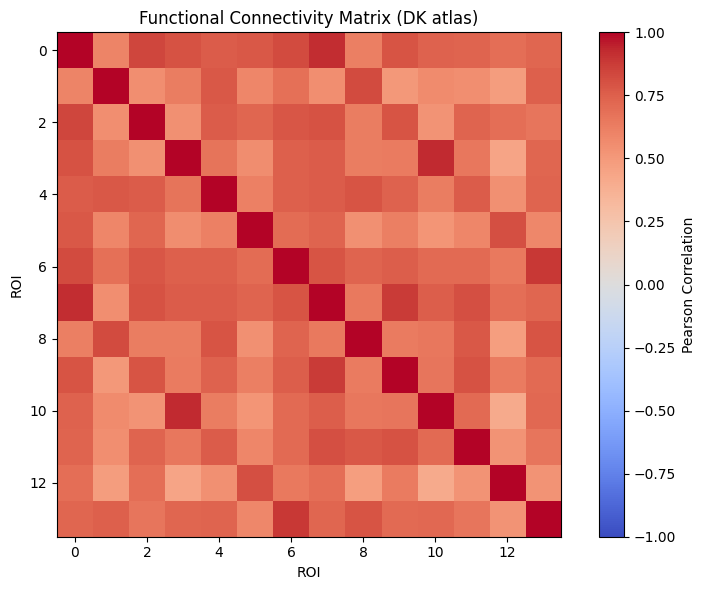

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 저장된 FC 행렬 경로 (예시: ses-21, run-01)
fc_path = "/nas/research/03-Neural_decoding/3-bids/derivatives/raw_rest/sub-01/fc_matrix_wo_low_mean.npy"

# FC 행렬 로드
fc_matrix = np.load(fc_path)

# 시각화
plt.figure(figsize=(8, 6))
plt.imshow(fc_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Pearson Correlation')
plt.title('Functional Connectivity Matrix (DK atlas)')
plt.xlabel('ROI')
plt.ylabel('ROI')
plt.tight_layout()
plt.show()